In [108]:
# Import libraries:
import pandas as pd
import numpy
import matplotlib.pyplot as plt

In [109]:
# Function that calculates the discount-rates sum:
def deltasumlog(i, n, delta):
    output = []
    while i <= n:
        otemp = delta**i
        output += [otemp]
        i += 1
    return sum(output)

def deltasumsqrt(i, n, delta):
    output = []
    while i <=n:
        otemp = (delta**(2*i))
        output += [otemp]
        i += 1
    return sum(output)


# Function that calculates the quality-yield of a certain amount of effort:
def qualitycalc(effort):
    threshold = 0.70
    if effort <= threshold:
        quality = effort / threshold
    #elif effort > -0.5 and effort < 0.5:
    elif effort > threshold and effort <= 1:
        quality = (1/(1-threshold))*(1-effort)
    else:
        quality = 0
    return quality
    

# Function that calculates all Efforts in all periods for a certain deadline
def contributioncalc(deadline, plots, uftype, printcontri):    
    strtemp = f"df_{deadline}"
    locals()[strtemp] = pd.DataFrame()

    period = 0
    j = 0
    indexlist = []
    while j <= deadline:
        indexlist += [j]
        j += 1
    locals()[strtemp]['Period'] = indexlist

    locals()[strtemp]['Period'] = indexlist

    while period <= deadline:
        contlist = []
        i = period
        z = 0
        v = 1
        while z < period:
            contlist += [locals()[strtemp].iloc[z,v]]
            z += 1
            v += 1

        if uftype == "log":
            cont = 1 - ( ( (deadline + 1 - i) - (w - sum(contlist)) ) / (1 + beta * deltasumlog(1, deadline - i,delta)) )
        if uftype == "sqrt":
            cont = 1 - ( ( (deadline + 1 - i) - (w - sum(contlist)) ) / (1 + (beta**2) * deltasumsqrt(1, deadline - i, delta)) )

        contlist += [cont]
        i += 1

        while i <= deadline:
            if uftype == "log":
                calcu = (1-(1-cont)*(beta*(delta**i)))
            if uftype == "sqrt":
                calcu = (1-(1-cont)*((beta**2)*(delta**(2*i))))

            contlist += [calcu]
            i += 1
        
        if printcontri == True:
            print(contlist, sum(contlist))
        
        locals()[strtemp][f'C_P{period}'] = contlist
        if period == deadline:
            cltemp = contlist
        x = 0
        while x < period:
            locals()[strtemp].iloc[x,period+1] = None
            x += 1
        period += 1
    if plots == True:
        plot = locals()[strtemp].plot(x = 'Period', marker = '.', markersize = 3, figsize=(12,9)).legend(bbox_to_anchor=(1.0, 1.0))
         ##colormap = 'hot') title = f"Effort decisions by period for deadline = {deadline}; delta = {delta}; beta = {beta}; W = {w}; Utilitytype = {uftype}",
        #plot



    return cltemp     

In [110]:
# Assign Variables

delta = 0.90        # Discount Factor
beta = 0.9          # Temporal Bias
w = 6        # Required accumulated Effort
r = 1.01           # Opportunity cost of a less tight deadline for the organization

print(f"delta = {delta}; beta = {beta}; w = {w};")

delta = 0.9; beta = 0.9; w = 6;


[0.21327586804274623, 0.48383029702284575, 0.581902540588505, 0.6613410578766892, 0.7256862568801181, 0.7778058680728956, 0.8200227531390455, 0.8542184300426268, 0.8819169283345277] 6.0
[0.21327586804274623, 0.39580578504942, 0.6789064222124488, 0.7399142019920835, 0.7893305036135876, 0.8293577079270059, 0.8617797434208748, 0.8880415921709086, 0.909313689658436] 6.305725514087511
[0.21327586804274623, 0.39580578504942, 0.5373389101889665, 0.800839571493485, 0.8386800529097228, 0.8693308428568755, 0.8941579827140691, 0.914267965998396, 0.9305570524587008] 6.394254031712381
[0.21327586804274623, 0.39580578504942, 0.5373389101889665, 0.6471592588729506, 0.8769720407800925, 0.9003473530318749, 0.9192813559558186, 0.934617898324213, 0.9470404976426127] 6.371838967888696
[0.21327586804274623, 0.39580578504942, 0.5373389101889665, 0.6471592588729506, 0.7325029854004523, 0.9244509421565984, 0.9388052631468448, 0.9504322631489442, 0.9598501331506448] 6.299621409157568
[0.21327586804274623, 0.39

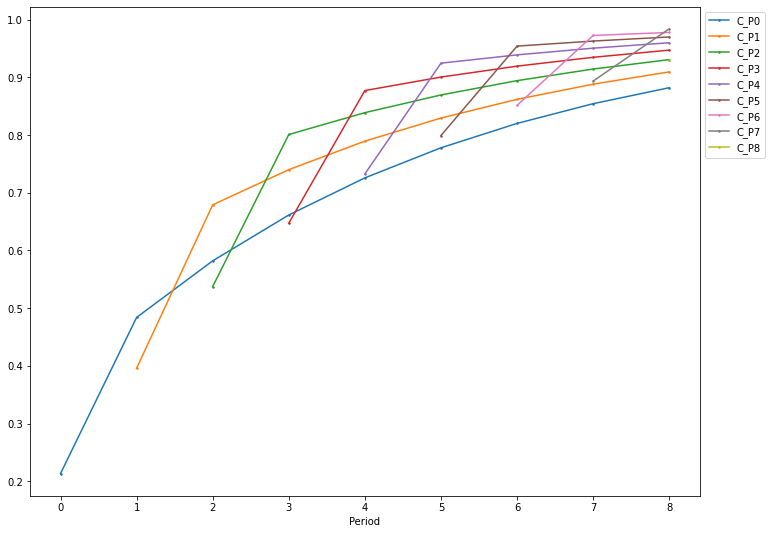

In [111]:
plottest1 = contributioncalc(8, True, "sqrt", True)

[0.21327586804274623, 0.48383029702284575, 0.581902540588505, 0.6613410578766892, 0.7256862568801181, 0.7778058680728956, 0.8200227531390455, 0.8542184300426268, 0.8819169283345277] 6.0
[0.21327586804274623, 0.39580578504942, 0.6789064222124488, 0.7399142019920835, 0.7893305036135876, 0.8293577079270059, 0.8617797434208748, 0.8880415921709086, 0.909313689658436] 6.305725514087511
[0.21327586804274623, 0.39580578504942, 0.5373389101889665, 0.800839571493485, 0.8386800529097228, 0.8693308428568755, 0.8941579827140691, 0.914267965998396, 0.9305570524587008] 6.394254031712381
[0.21327586804274623, 0.39580578504942, 0.5373389101889665, 0.6471592588729506, 0.8769720407800925, 0.9003473530318749, 0.9192813559558186, 0.934617898324213, 0.9470404976426127] 6.371838967888696
[0.21327586804274623, 0.39580578504942, 0.5373389101889665, 0.6471592588729506, 0.7325029854004523, 0.9244509421565984, 0.9388052631468448, 0.9504322631489442, 0.9598501331506448] 6.299621409157568
[0.21327586804274623, 0.39

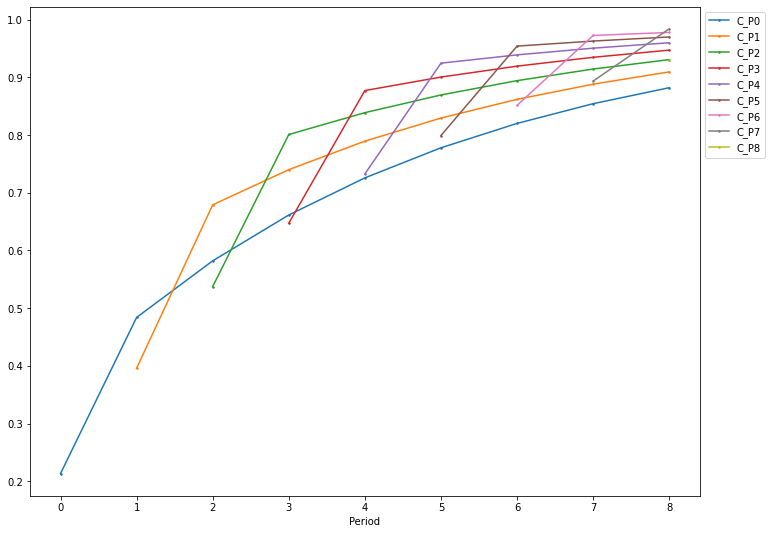

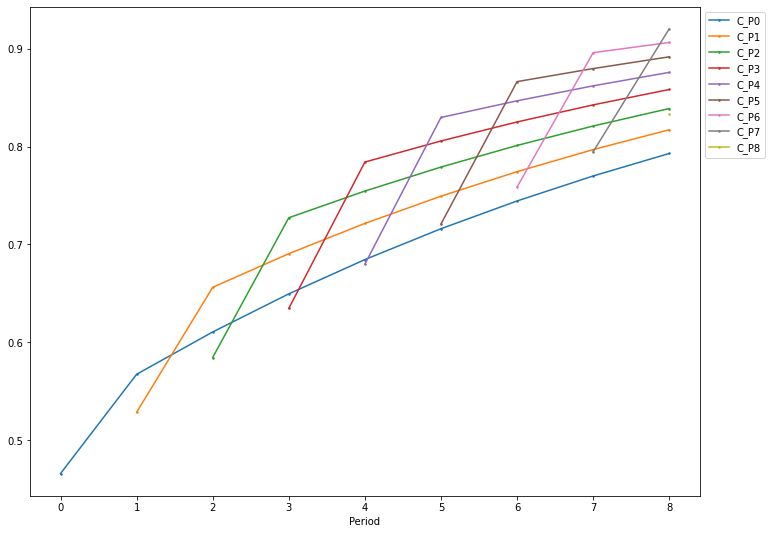

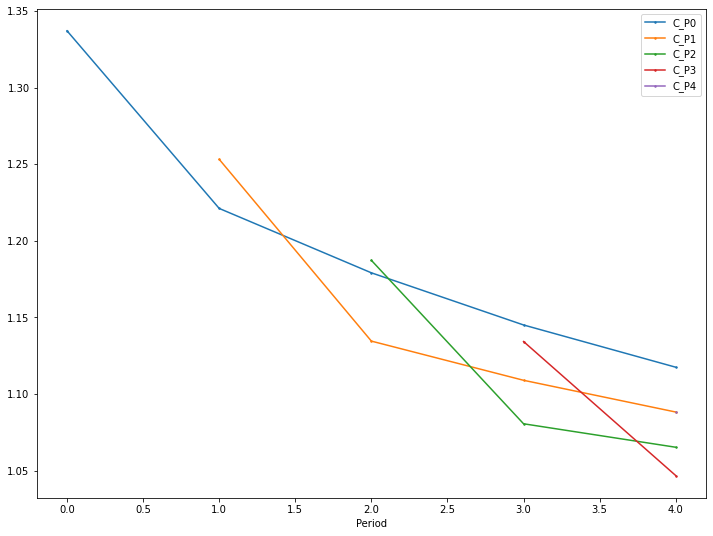

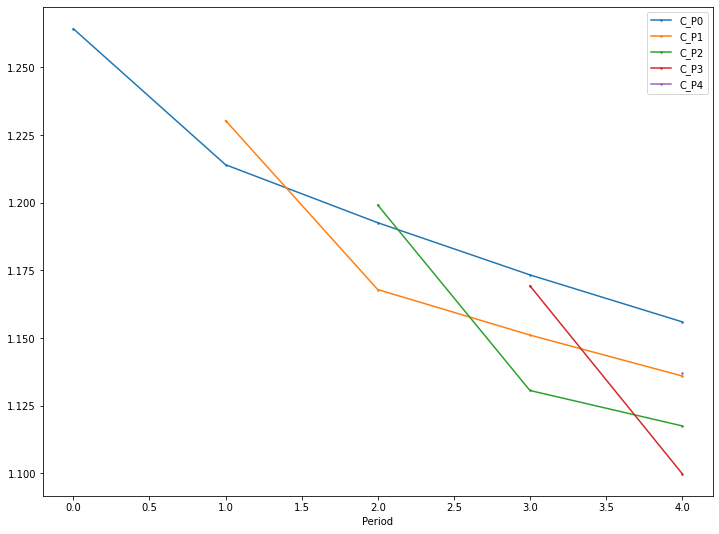

In [112]:
# Interesting Plots:
plottest1 = contributioncalc(8, True, "sqrt", True)
plottest2 = contributioncalc(8, True, "log", False)
plottest3 = contributioncalc(4, True, "sqrt", False)
plottest4 = contributioncalc(4, True, "log", False)

    deadline   quality  logquality  sqrtquality  profitslog  profitssqrt
0          6  3.333333    1.203973     1.825742    1.134197     1.719931
1          7  6.095337    1.807524     2.468874    1.685910     2.302763
2          8  7.105578    1.960880     2.665629    1.810840     2.461664
3          9  7.524639    2.018183     2.743108    1.845305     2.508132
4         10  7.689238    2.039822     2.772948    1.846624     2.510313
5         11  7.747170    2.047328     2.783374    1.835068     2.494804
6         12  7.731276    2.045274     2.780517    1.815077     2.467568
7         13  7.664242    2.036566     2.768437    1.789454     2.432522
8         14  7.562085    2.023147     2.749925    1.760063     2.392332
9         15  7.436315    2.006375     2.726961    1.728190     2.348866
10        16  7.237791    1.979316     2.690314    1.688003     2.294357
11        17  7.019333    1.948668     2.649402    1.645412     2.237096
12        18  6.779098    1.913844     2.603670    

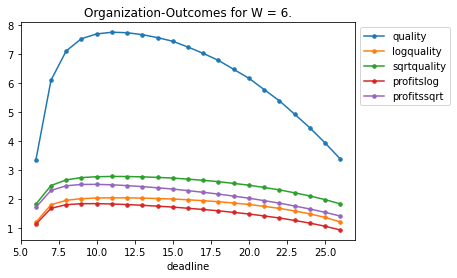

In [113]:
qualitydf = pd.DataFrame()
deadlinelist = []
qualitylist = []

t = int(w) # + 1
b = 2*t + 15

while t < b:
    quallist = [qualitycalc(i) for i in contributioncalc(t, False, "log", False)]
    if sum(quallist) > 1:
        qualsum = sum(quallist)
    else:
        qualsum = 1
    qualitylist += [qualsum]
    deadlinelist += [t]
    t += 1

sqrtquality = [i**0.5 for i in qualitylist]
logquality = [numpy.log(i) for i in qualitylist]

qualitydf['deadline'] = deadlinelist
qualitydf['quality'] = qualitylist
qualitydf['logquality'] = logquality
qualitydf['sqrtquality'] = sqrtquality

rows = len(qualitydf)
profitlist = []
profitlistsq = []
f = 0

while f < rows:
    dlin = qualitydf.iloc[f,0]
    lqual = qualitydf.iloc[f,2]
    squal = qualitydf.iloc[f,3]
    profitlog = ((1/(r**dlin))*lqual)
    profitsqrt = ((1/(r**dlin))*squal)
    profitlist += [profitlog]
    profitlistsq += [profitsqrt]
    f += 1

qualitydf['profitslog'] = profitlist
qualitydf['profitssqrt'] = profitlistsq

qualitydf.plot(x = 'deadline', marker = '.', markersize = 7, title = f"Organization-Outcomes for W = {w}.").legend(bbox_to_anchor=(1.0, 1.0))

print(qualitydf)

maxprofit = qualitydf['profitslog'].idxmax()
maxprofitsq = qualitydf['profitssqrt'].idxmax()
optimaldeadlinelog = qualitydf.iloc[maxprofit,0]
optimaldeadlinesqrt = qualitydf.iloc[maxprofitsq,0]

print(f"Log: The optimal Deadline is: {optimaldeadlinelog} Periods.")
print(f"Sqrt: The optimal Deadline is: {optimaldeadlinesqrt} Periods.")